<a href="https://colab.research.google.com/github/kashish1720/mldl_lab_sem6/blob/main/exp4/mldl_exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# K-Nearest Neighbors (KNN) Classification
# Dataset: Heart Disease
# ============================================

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset
data = pd.read_csv('/content/sample_data/heart.csv')   # Ensure filename matches uploaded file

# Step 3: Define Features and Target
X = data.drop('target', axis=1)
y = data['target']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Prediction
y_pred = knn.predict(X_test)

# Step 8: Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.8341463414634146

Confusion Matrix:
 [[79 23]
 [11 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



Accuracy vs K Value Graph




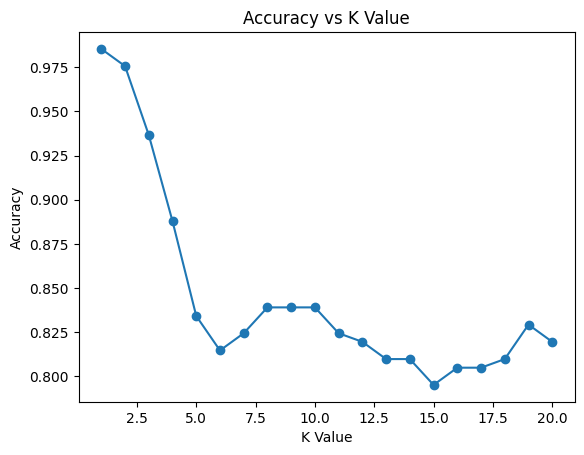

In [2]:
# Finding best K value
accuracy_scores = []

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_k = knn_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

plt.figure()
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

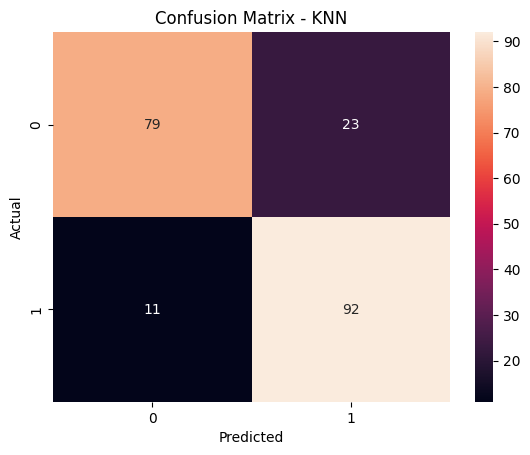

In [3]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()